In [1]:
#import modules and packages needed
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#read file as csv
df = pd.read_csv('hospital_readmissions.csv')
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [4]:
# Check missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64


In [5]:
print("Duplicate Rows in Dataset:")
print(df.duplicated().sum())


Duplicate Rows in Dataset:
0


In [6]:
#renaming some columns

df.rename(columns={'diag_1':'primary_diagnosis','diag_2':'sec_diagnosis',
                       'diag_3':'additional_sec_diag','change':'med_change','A1Ctest':'HbA1ctest'},inplace=True)

df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [7]:

print(df['age'].unique())

['[70-80)' '[50-60)' '[60-70)' '[40-50)' '[80-90)' '[90-100)']


In [8]:
# Define the correct bins and labels
bins = [40, 50, 60, 70, 80, 90, 100]  
labels = ['early-middle age', 'late-middle age', 'mid-old age', 'senior-old age', 
          'very senior-old', 'centenarians'] 

# Create the 'age_cat' column using pd.cut()
df['age_cat'] = pd.cut(df['age'].str.extract('(\d+)-(\d+)')[0].astype(int), 
                            bins=bins, labels=labels, right=False)

# Convert 'age_cat' column to a categorical data type
df['age_cat'] = df['age_cat'].astype('category')

# Print the updated dataframe to check the results
print(df[['age', 'age_cat']].head(10))



       age           age_cat
0  [70-80)    senior-old age
1  [70-80)    senior-old age
2  [50-60)   late-middle age
3  [70-80)    senior-old age
4  [60-70)       mid-old age
5  [40-50)  early-middle age
6  [50-60)   late-middle age
7  [60-70)       mid-old age
8  [80-90)   very senior-old
9  [70-80)    senior-old age


In [9]:
df.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'primary_diagnosis', 'sec_diagnosis',
       'additional_sec_diag', 'glucose_test', 'HbA1ctest', 'med_change',
       'diabetes_med', 'readmitted', 'age_cat'],
      dtype='object')

In [10]:
df = df.drop('age', axis=1)


In [11]:
#changing data type to the correct data type
# Columns to be converted to categorical datatype
cols_to_convert = ['medical_specialty', 'primary_diagnosis', 'sec_diagnosis', 'additional_sec_diag', 'glucose_test', 'HbA1ctest', 'med_change', 'diabetes_med', 'readmitted']

# Convert columns to categorical datatype
df[cols_to_convert] = df[cols_to_convert].astype('category')
#checking data type
df.dtypes

time_in_hospital          int64
n_lab_procedures          int64
n_procedures              int64
n_medications             int64
n_outpatient              int64
n_inpatient               int64
n_emergency               int64
medical_specialty      category
primary_diagnosis      category
sec_diagnosis          category
additional_sec_diag    category
glucose_test           category
HbA1ctest              category
med_change             category
diabetes_med           category
readmitted             category
age_cat                category
dtype: object

In [12]:
df

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
0,8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no,senior-old age
1,3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no,senior-old age
2,5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes,late-middle age
3,2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes,senior-old age
4,1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no,mid-old age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes,very senior-old
24996,2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes,very senior-old
24997,5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes,senior-old age
24998,2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no,senior-old age


In [13]:
#viewing the unique values of each column to check for inconsistent data
cols = df.columns

for c in cols:
    print(c)
    print('\n',df[c].unique())

time_in_hospital

 [ 8  3  5  2  1  4  7 10  6 12 11  9 14 13]
n_lab_procedures

 [ 72  34  45  36  42  51  44  19  67  37  35  69  60  73  52   9  16  62
  54  58  40  23  32  65   1  47  39  59  68  66  43  30  46  48   5  24
  70  25  29  49  53  94  18  61  11  33  28  83  50  71  86  38   3  41
  31  55  56  27  64  82  26  90  21   2  20  17  78 102  75  15   8   7
  76  63  57  10   4  22  91  74  14  13  89  79  81  84  80   6  77  12
 108  88  92  93 101  97 100  85  95  87  98  96  99 103 111 106 113 109
 105]
n_procedures

 [1 2 0 6 3 5 4]
n_medications

 [18 13 12  7 10 21 16  6 26 20 11 27 15  8 22 17 14 28  5 24  9 19  1 25
 32  3 31 23 39 34 40  4 38  2 33 56 44 29 46 30 47 41 35 36 50 49 54 57
 60 37 61 52 51 42 53 43 45 59 62 79 63 55 65 48 58 69 68 72 75 64]
n_outpatient

 [ 2  0  1  3  7  5  4  6  9  8 11 10 15 21 13 12 27 16 14 33 20 18 23]
n_inpatient

 [ 0  2  3  1  6  9  7  4  5  8 10 11 14 12 15 13]
n_emergency

 [ 0  1 10  2  3  4  5  7  6 12  8 16 28 18 11  9 

### Data Cleaning

The dataset contained 2500 rows and 17 columns, and these were what I did to the columns:

There were no missing or duplicates data in the dataframe.

The columns named diag_1 ,diag_2,diag_3,change,A1Ctest, were renamed as primary_diagnosis ,sec_diagnos ,additional_sec_diag ,med_change , HbA1ctest respectively

For the age column although the wrong categorization done already couldn't be corrected, the various age categories named as [70-80), [50-60),[60-70), [40-50), [80-90),[90-100), were renamed as senior-old age, late-middle age , mid-oldd-age, early-middle age, very senior-old,centenarians respectively.

The data type of these rows (medical_specialty, primary_diagnosis , sec_diagnosis, additional_sec_diag, glucose_test, HbA1ctest, med_change, diabetes_med, readmitted)were converted to categorical data type

### EXPLORATORY DATA ANALYSIS

In [14]:
#using pd.describe to explore numeric columns
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [15]:
#describing the categorical columns
df.describe(exclude=[np.number])

,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,7,8,8,8,3,3,2,2,2,6
top,Missing,Circulatory,Other,Other,no,no,no,yes,no,senior-old age
freq,12382,7824,9056,9107,23625,20938,13497,19228,13246,6837


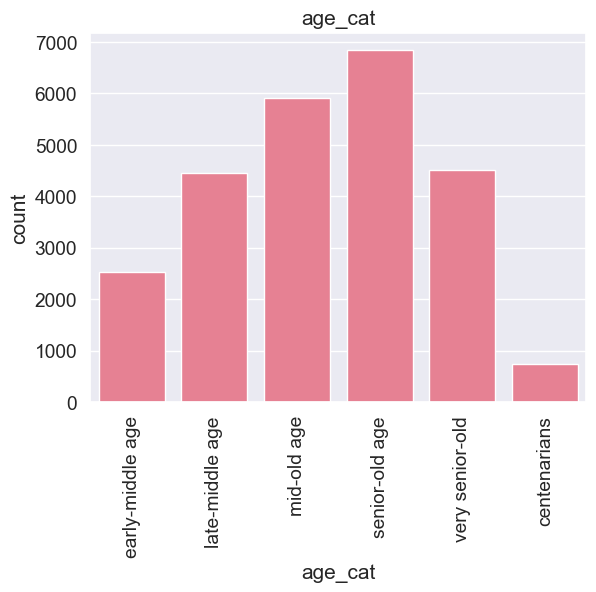

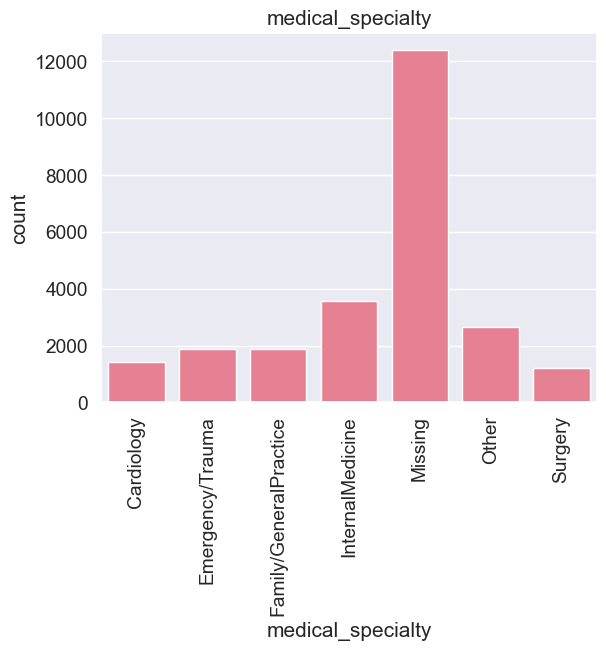

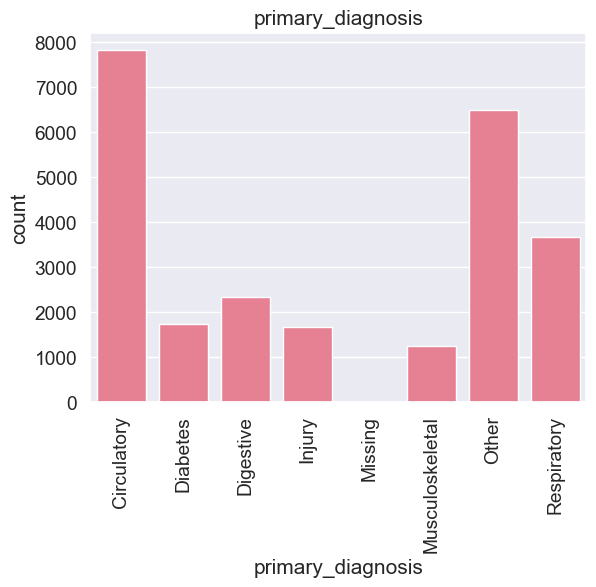

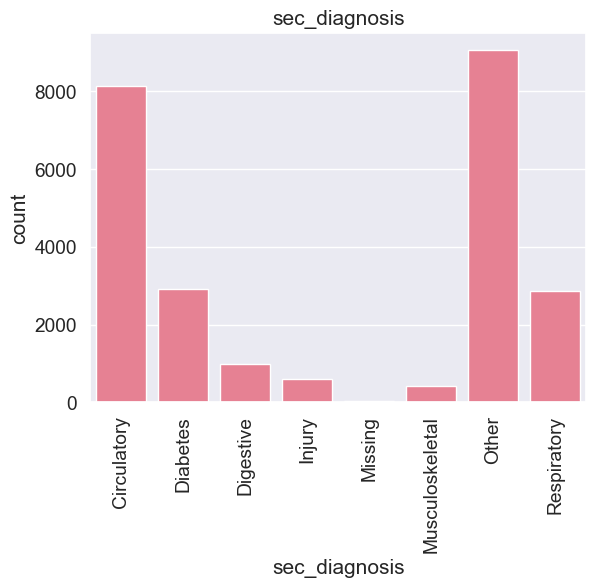

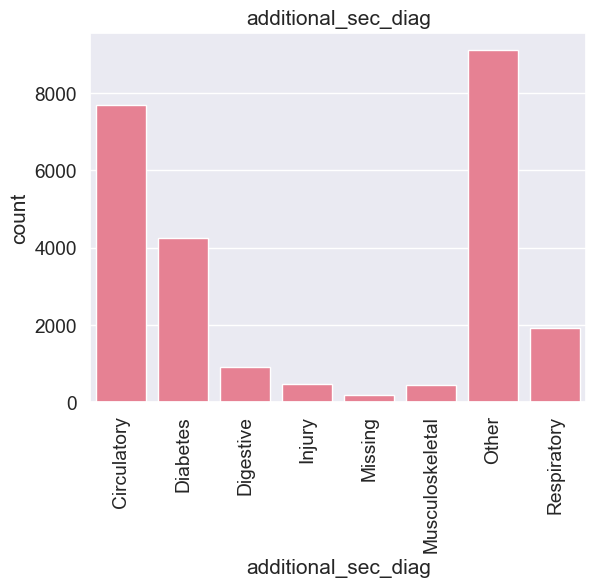

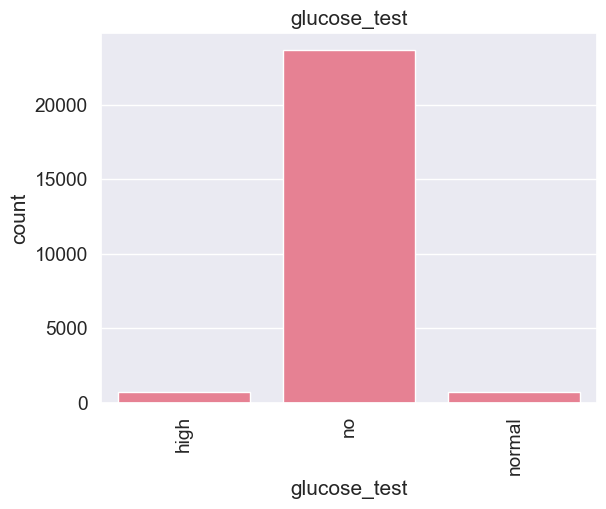

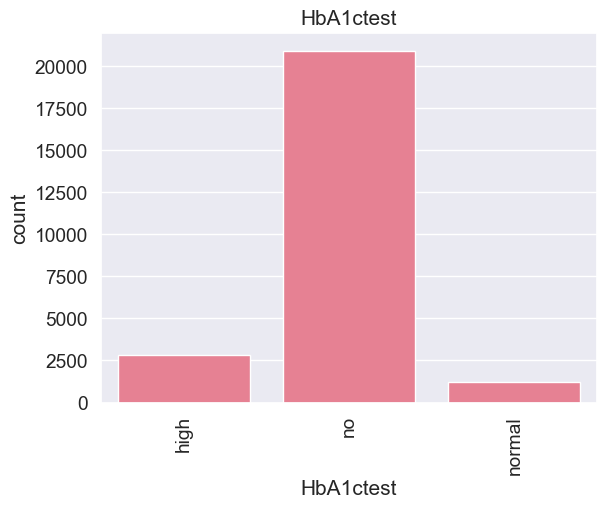

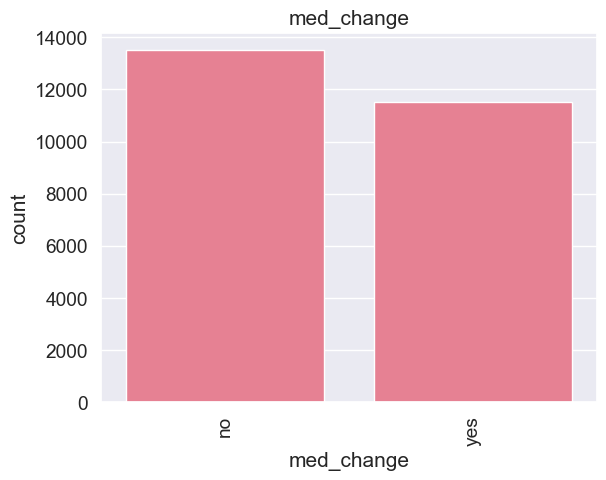

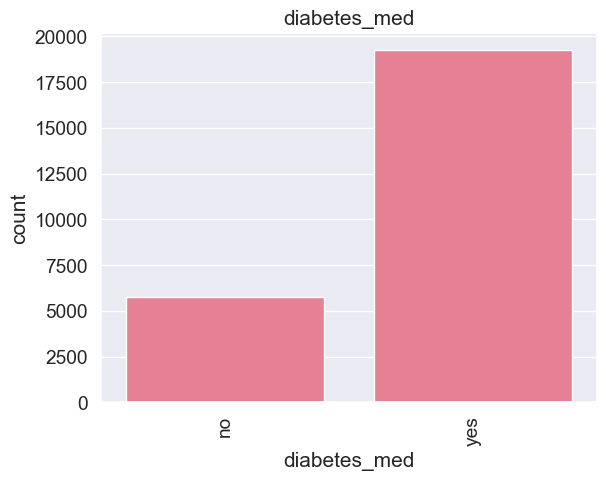

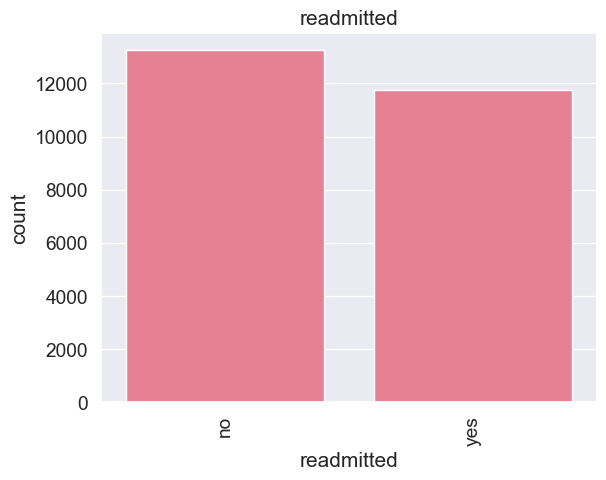

In [16]:
#visualize the information above for easy understanding
#value counting the categorical columns

columns = ['age_cat','medical_specialty','primary_diagnosis',
           'sec_diagnosis','additional_sec_diag','glucose_test','HbA1ctest','med_change','diabetes_med','readmitted']

sns.set(style='darkgrid',font_scale=1.25)
sns.set_palette('husl',)

def plot_cat_count():
    for c in columns:
        sns.countplot(x=c, data=df)
        plt.title(c)
        plt.xticks(rotation=90)
        plt.show()
        
plot_cat_count()

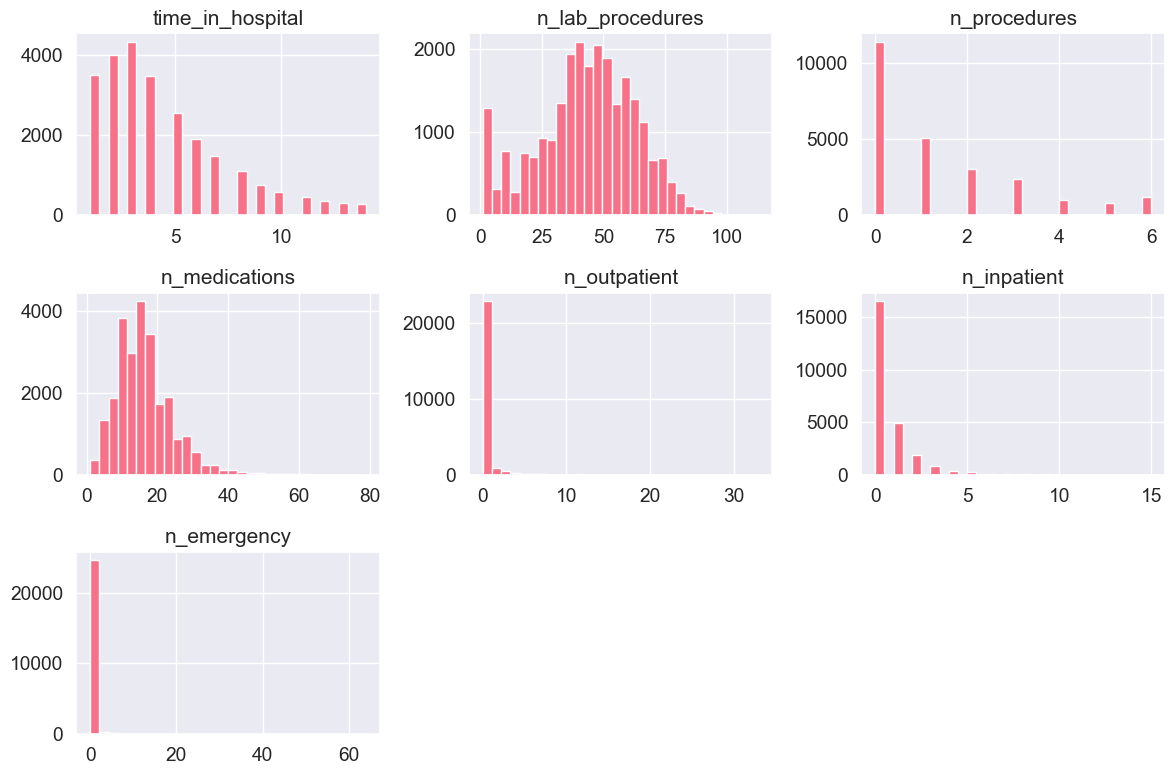

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical variables
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()


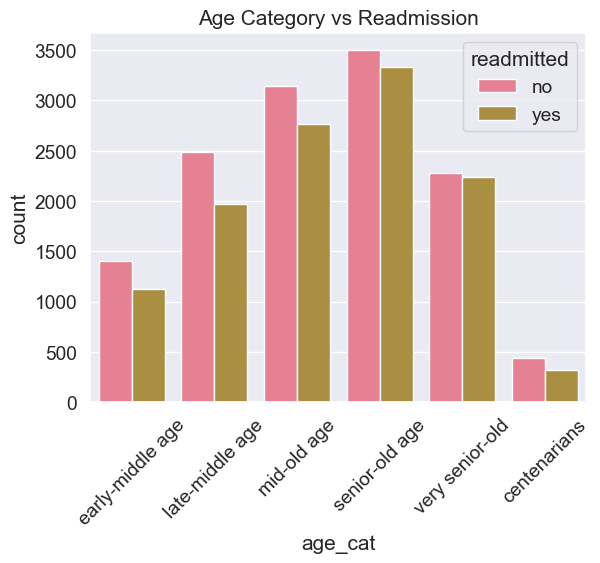

In [18]:
sns.countplot(x='age_cat', hue='readmitted', data=df)
plt.xticks(rotation=45)
plt.title("Age Category vs Readmission")
plt.show()


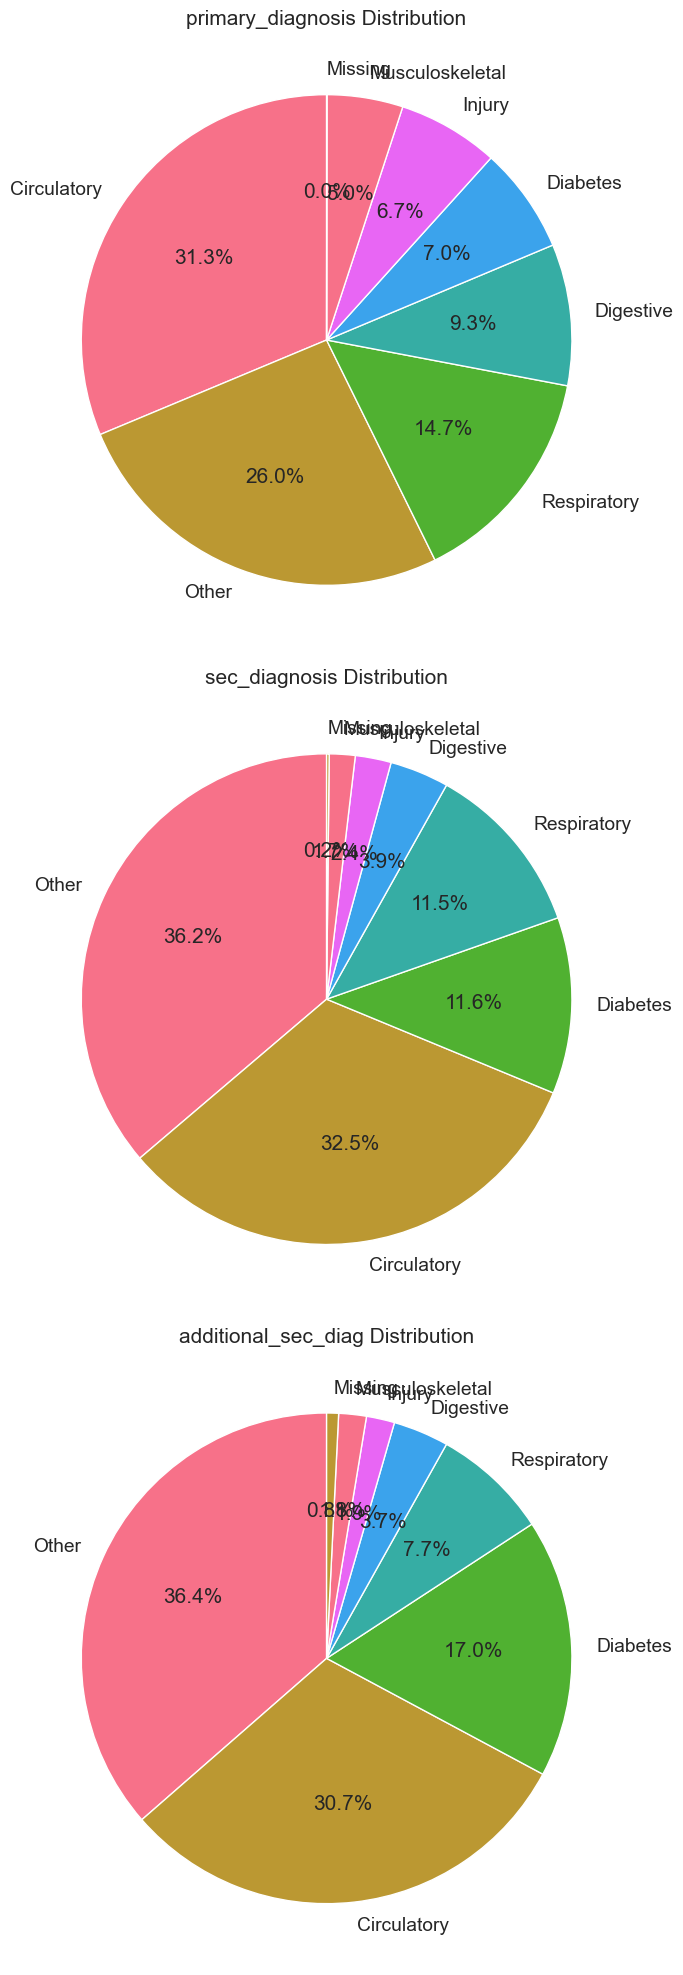

In [19]:
#distribution health conditions for the various diagnosis 

cat_vars = ['primary_diagnosis','sec_diagnosis','additional_sec_diag']

fig,axs = plt.subplots(nrows=3, ncols=1, figsize=(25,20))

for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        cat_counts = df[var].value_counts()
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs.flat[i].set_title(f'{var} Distribution')
        
fig.tight_layout()
plt.show()

In [20]:
#subsetting for patient with DM diagnosis
diabetes_pt = df[(df['primary_diagnosis'] == 'Diabetes') | (df['sec_diagnosis'] == 'Diabetes') |
       (df['additional_sec_diag'] == 'Diabetes')]
diabetes_pt.head()


,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
3,2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes,senior-old age
12,8,67,0,21,0,0,0,Other,Diabetes,Circulatory,Other,no,normal,no,yes,no,senior-old age
14,2,73,1,26,0,0,0,InternalMedicine,Circulatory,Other,Diabetes,no,no,no,yes,no,very senior-old
16,3,52,0,10,0,0,0,Other,Circulatory,Other,Diabetes,no,no,no,yes,yes,senior-old age
18,7,72,0,13,0,0,0,InternalMedicine,Diabetes,Other,Other,no,high,no,yes,yes,early-middle age


In [21]:
non_diabetes_pt = df[
    (df['primary_diagnosis'] != 'Diabetes') & 
    (df['sec_diagnosis'] != 'Diabetes') & 
    (df['additional_sec_diag'] != 'Diabetes')
]

non_diabetes_pt.head()



,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
0,8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no,senior-old age
1,3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no,senior-old age
2,5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes,late-middle age
4,1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no,mid-old age
5,2,51,0,10,0,0,0,Missing,Other,Other,Other,no,no,no,no,yes,early-middle age


In [22]:
#numbers of non-DM patient
print('number of non-DM patient: ',len(non_diabetes_pt.index))

#numbers of DM patient
print('number of DM patient: ',len(diabetes_pt.index))


number of non-DM patient:  16212
number of DM patient:  8788


In [23]:
#value counts of DM patients readmitted
diabetes_pt['readmitted'].value_counts(normalize=True)

no     0.534706
yes    0.465294
Name: readmitted, dtype: float64

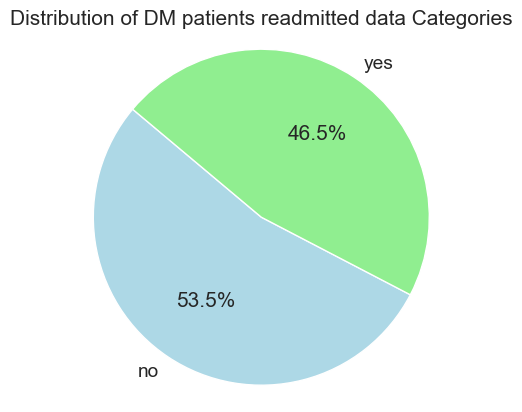

In [24]:
# Data for the pie chart
readmitted_data = {
    'no'   :  0.534706,
    'yes'   : 0.465294
}

# Create a figure and axis
fig, ax = plt.subplots()

# Data for the pie chart
labels = [f"{status}" for status in readmitted_data.keys()]
sizes = list(readmitted_data.values())

# Colors for the pie chart
colors = ['lightblue', 'lightgreen']

# Plot the pie chart
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Aspect ratio to make the pie circular
ax.axis('equal')

# Title for the pie chart
plt.title('Distribution of DM patients readmitted data Categories')

# Show the pie chart
plt.show()

In [25]:
#value counts of non-DM patients readmitted
non_diabetes_pt['readmitted'].value_counts(normalize=True)

no     0.527202
yes    0.472798
Name: readmitted, dtype: float64

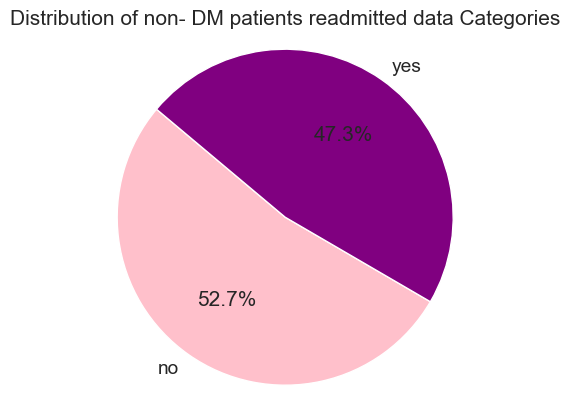

In [26]:
# Data for the pie chart
readmitted_data = {
    'no'   :  0.527202,
    'yes'   : 0.472798
}

# Create a figure and axis
fig, ax = plt.subplots()

# Data for the pie chart
labels = [f"{status}" for status in readmitted_data.keys()]
sizes = list(readmitted_data.values())

# Colors for the pie chart
colors = ['pink', 'purple']

# Plot the pie chart
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Aspect ratio to make the pie circular
ax.axis('equal')

# Title for the pie chart
plt.title('Distribution of non- DM patients readmitted data Categories')

# Show the pie chart
plt.show()

In [27]:
#table showing the count of readmitted patient for each diagnosis
pd.set_option('display.max_rows', 64)
df.groupby(['primary_diagnosis','sec_diagnosis','additional_sec_diag'])['readmitted'].count().to_frame().unstack()

readmitted                            \
additional_sec_diag               Circulatory Diabetes Digestive Injury   
primary_diagnosis sec_diagnosis                                           
Circulatory       Circulatory            1724      877        48     66   
                  Diabetes                394       28        12      8   
                  Digestive                26        6        10      0   
                  Injury                   70       21         3     14   
                  Missing                   3        0         0      0   
                  Musculoskeletal           9       11         2      1   
                  Other                   595      381        35     18   
                  Respiratory             378      145        16     15   
Diabetes          Circulatory             133       10        13      6   
                  Diabetes                  2        1         2      0   
                  Digestive                13        2        13      2   
                  Injury                    4        0         1      2   
                  Missing                   0        0         0      0   
                  Musculoskeletal          18        0         0      2   
                  Other                   237       25        46     11   
                  Respiratory              35        1         3      1   
Digestive         Circulatory             121       85        39      4   
                  Diabetes                 99        3        38      1   
                  Digestive                60       92        81      3   
                  Injury                    8        3         7      1   
                  Missing                   0        1         0      0   
                  Musculoskeletal           3        4         2      0   
                  Other                   206      174       129     13   
                  Respiratory              56       26        21      2   
Injury            Circulatory             118       74         1     16   
                  Diabetes                 62        5         2      6   
                  Digestive                10       10         6      2   
                  Injury                   36       17         2     27   
                  Missing                   0        5         0      0   
                  Musculoskeletal           6        8         1      2   
                  Other                   172      133        13     51   
                  Respiratory              23        7         2      8   
Missing           Circulatory               0        0         0      0   
                  Diabetes                  1        0         0      0   
                  Digestive                 0        0         0      0   
                  Injury                    0        0         0      0   
                  Missing                   0        0         0      0   
                  Musculoskeletal           0        0         0      0   
                  Other                     0        1         0      0   
                  Respiratory               0        0         0      0   
Musculoskeletal   Circulatory              71      128         5      6   
                  Diabetes                122        5         2      1   
                  Digestive                 7        4         3      2   
                  Injury                    4        5         5      2   
                  Missing                   0        0         0      0   
                  Musculoskeletal          22       48         0      4   
                  Other                    95      110         7     13   
                  Respiratory              28       20         0      4   
Other             Circulatory             347      280        34     16   
                  Diabetes                288       17        30     15   
                  Digestive                50       54      

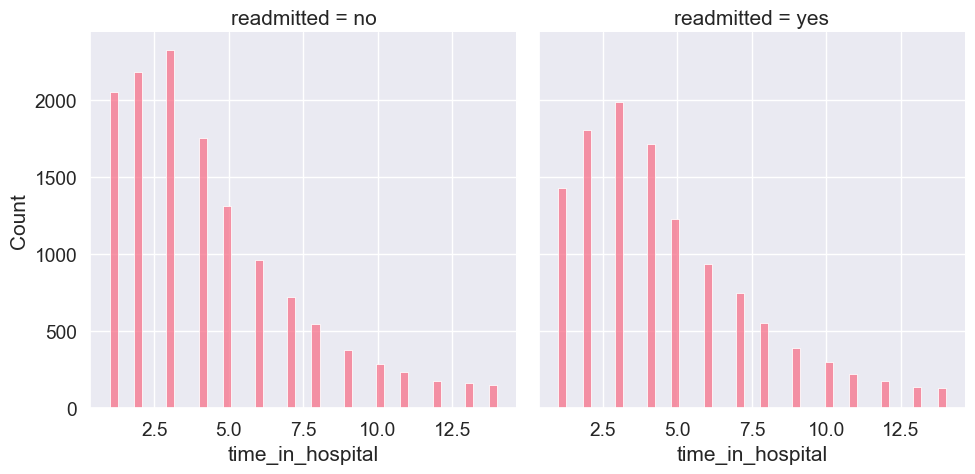

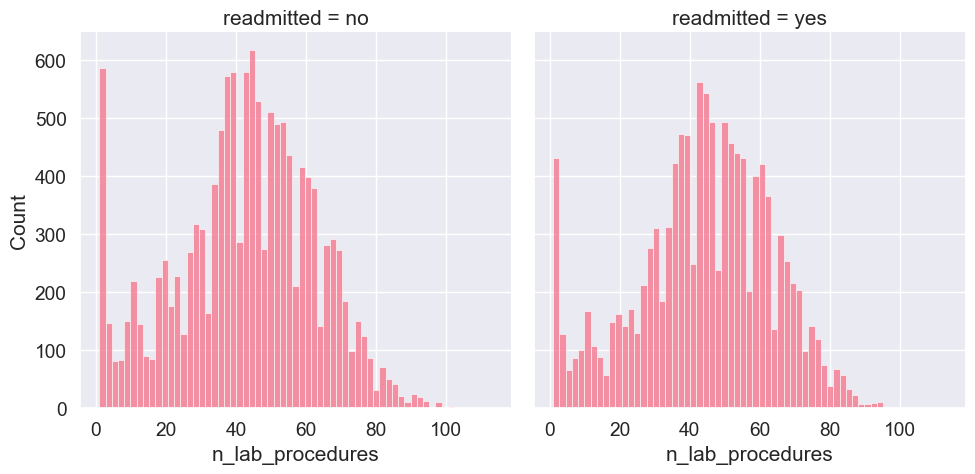

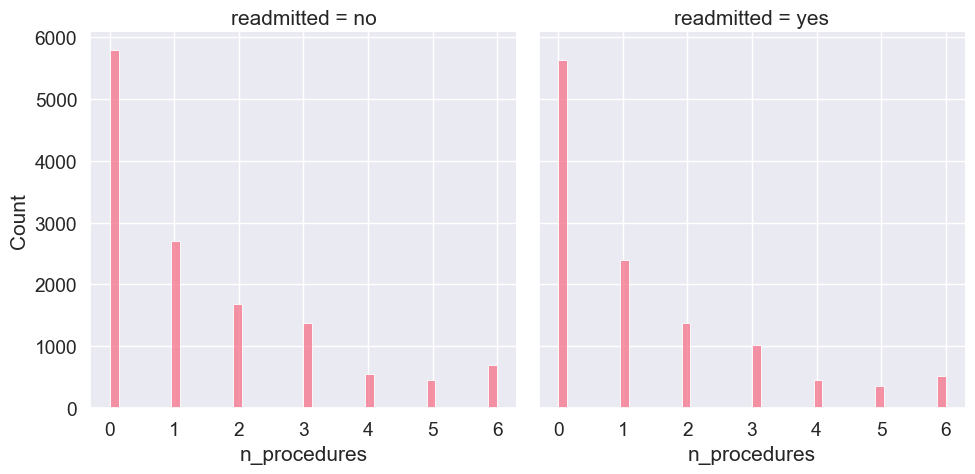

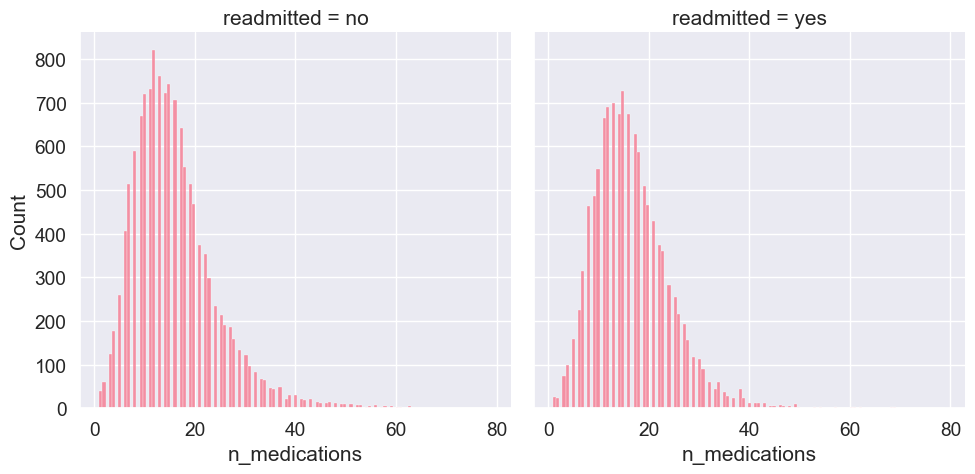

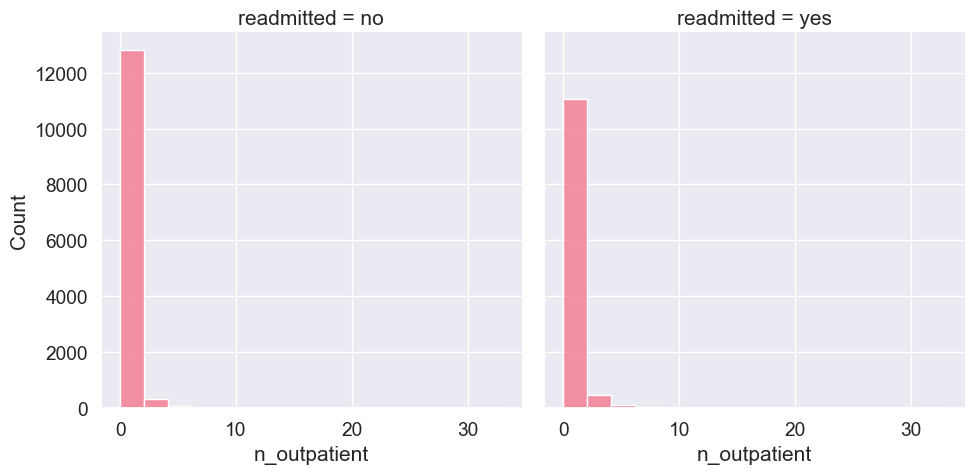

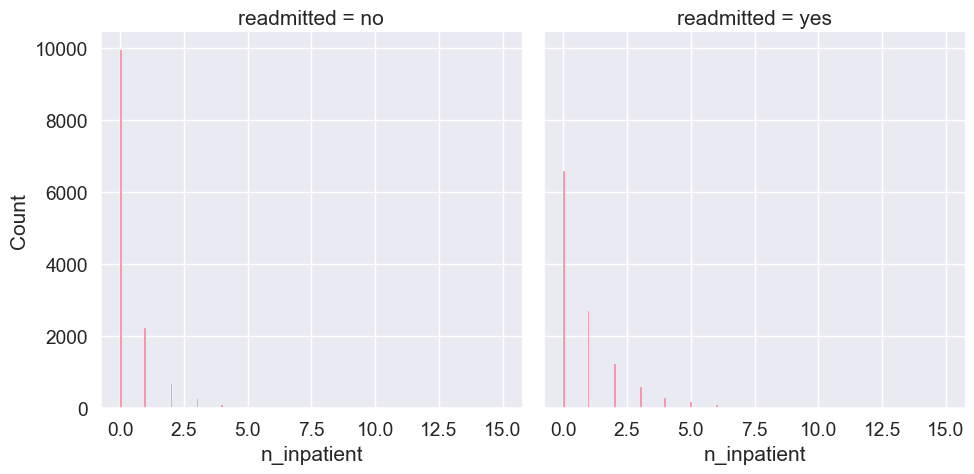

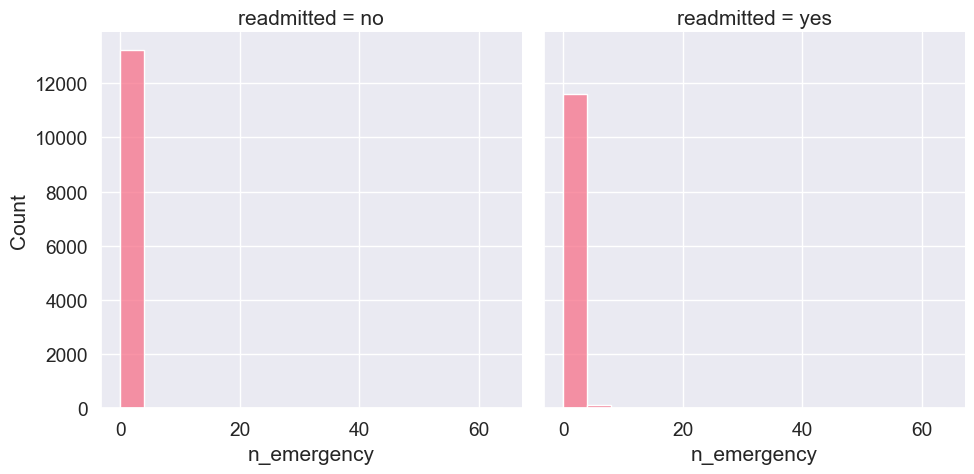

In [28]:
#plotting a grap showing the distribution of numerical columns by their readmitted status
columns = ['time_in_hospital','n_lab_procedures','n_procedures','n_medications','n_outpatient','n_inpatient','n_emergency']

sns.set(style='darkgrid',font_scale=1.25)
sns.set_palette('husl',3)

def plot_cat_count():
    for c in columns:
        sns.displot(x=c, data=df, col='readmitted',col_wrap=2)
        #plt.title(c)
        #plt.xticks(rotation=90)
        plt.show()
        
plot_cat_count()

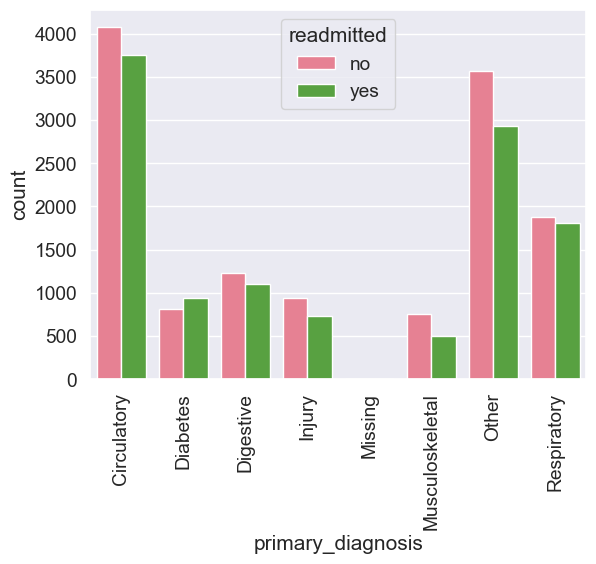

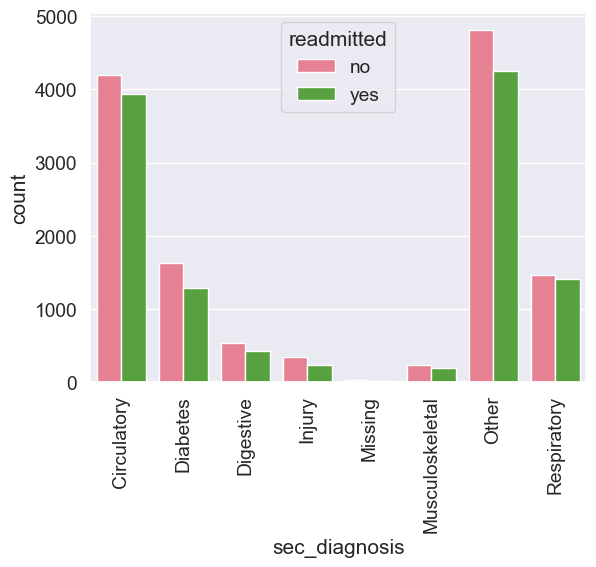

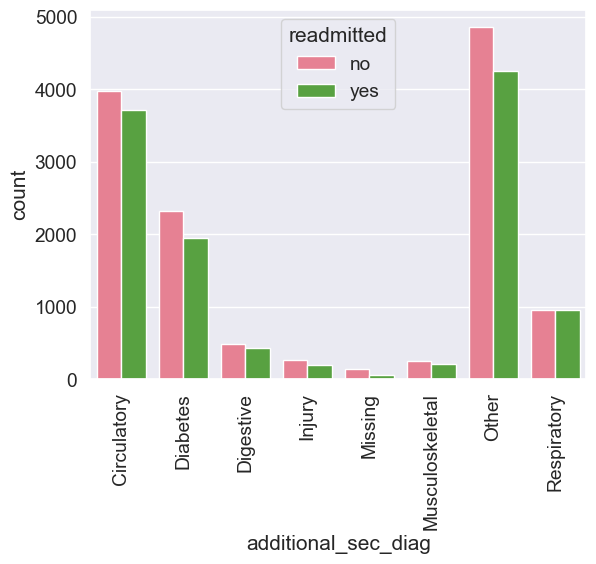

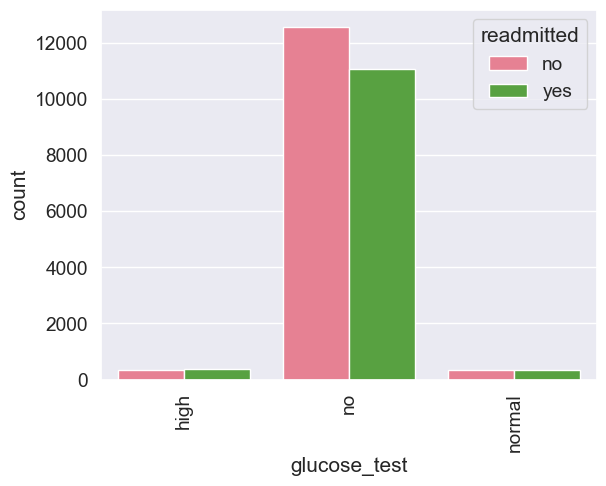

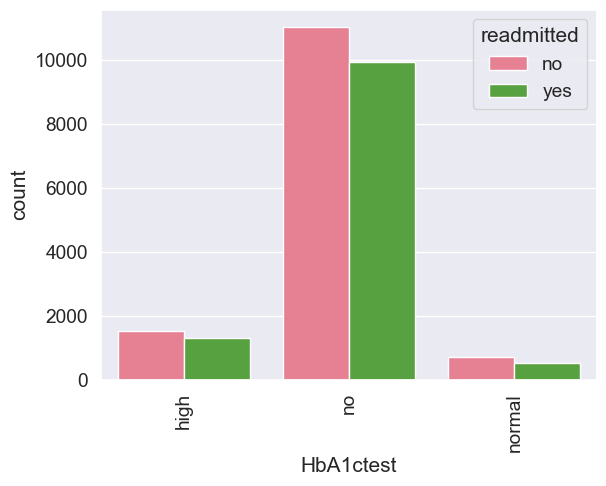

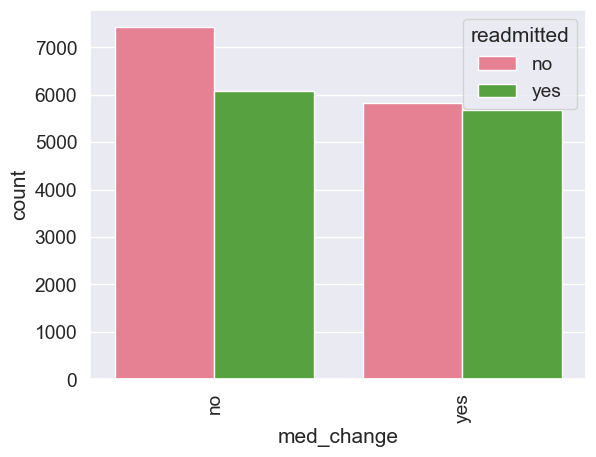

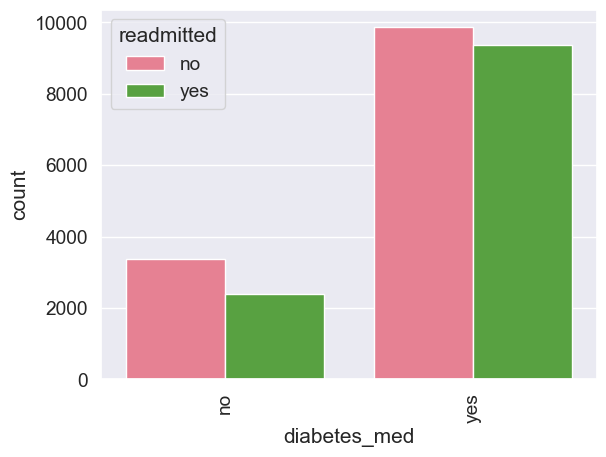

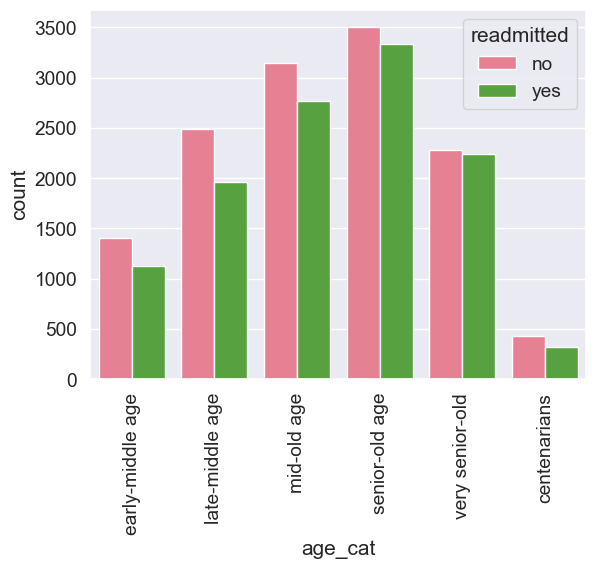

In [29]:
#visualizing the categorical columns by thier readmitted status
columns = ['primary_diagnosis','sec_diagnosis','additional_sec_diag',
           'glucose_test','HbA1ctest','med_change','diabetes_med','age_cat']

def count_plot():
    for c in columns:
        sns.countplot(x=c, hue='readmitted', data=df)
        plt.xticks(rotation=90)
        plt.show()
        
count_plot()

In [30]:
df['readmitted'] = df['readmitted'].map({'yes': 1, 'no': 0})


In [31]:
df

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
0,8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,0,senior-old age
1,3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,0,senior-old age
2,5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,1,late-middle age
3,2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,1,senior-old age
4,1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,0,mid-old age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,1,very senior-old
24996,2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,1,very senior-old
24997,5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,1,senior-old age
24998,2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,0,senior-old age


/var/folders/zp/95s5svbx2n569pqxrr3p2hn00000gn/T/ipykernel_15801/1353421908.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='YlGnBu', fmt='.2g', annot=True)


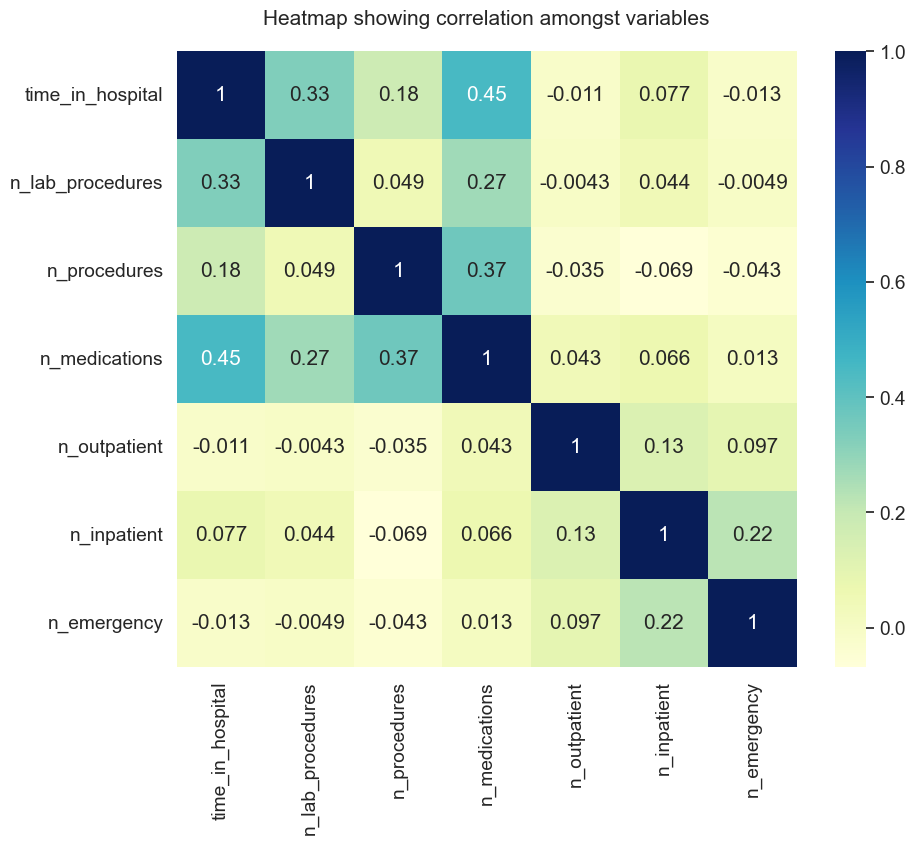

In [32]:
#visualizing correlation between variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='YlGnBu', fmt='.2g', annot=True)

plt.title('Heatmap showing correlation amongst variables',y=1.03)
plt.show()

In [60]:
# Performing ANOVA between age categories and readmission status
from scipy import stats
group1 = df[df['age_cat'] == 'early-middle age']['readmitted']
group2 = df[df['age_cat'] == 'late-middle age']['readmitted']
group3 = df[df['age_cat'] == 'mid-old age']['readmitted']
group4 = df[df['age_cat'] == 'senior-old age']['readmitted']
f_stat, p_val = stats.f_oneway(group1, group2, group3, group4)
print(f"ANOVA F-statistic: {f_stat}, P-value: {p_val}")


ANOVA F-statistic: 9.49632454132172, P-value: 2.895027144895453e-06


### This ANOVA test is comparing the readmission status between four different age categories: early-middle age, late-middle age, mid-old age, and senior-old age.

F-statistic (9.50): The F-statistic quantifies the variation between the group means relative to the variation within each group. A higher F-statistic suggests a greater difference between group means.

P-value (2.90e-06): The p-value is extremely small (much less than the standard threshold of 0.05), indicating that there is a statistically significant difference in readmission status across the different age categories. This means that age category likely influences readmission status, and you can reject the null hypothesis that there is no difference in readmission rates among the groups.

In conclusion, the analysis suggests that the readmission status differs significantly across age categories.

In [34]:
#preprocessing categorical columns using pd get dummies
#dropping medical_specialty and 'readmitted'
features = df.drop(['medical_specialty','readmitted'], axis=1)
features


,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,age_cat
0,8,72,1,18,2,0,0,Circulatory,Respiratory,Other,no,no,no,yes,senior-old age
1,3,34,2,13,0,0,0,Other,Other,Other,no,no,no,yes,senior-old age
2,5,45,0,18,0,0,0,Circulatory,Circulatory,Circulatory,no,no,yes,yes,late-middle age
3,2,36,0,12,1,0,0,Circulatory,Other,Diabetes,no,no,yes,yes,senior-old age
4,1,42,0,7,0,0,0,Other,Circulatory,Respiratory,no,no,no,yes,mid-old age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,14,77,1,30,0,0,0,Circulatory,Other,Circulatory,no,normal,no,no,very senior-old
24996,2,66,0,24,0,0,0,Digestive,Injury,Other,no,high,yes,yes,very senior-old
24997,5,12,0,6,0,1,0,Other,Other,Other,normal,no,no,no,senior-old age
24998,2,61,3,15,0,0,0,Respiratory,Diabetes,Other,no,no,yes,yes,senior-old age


In [35]:

#using pandas get dummies encoder
X_features = pd.get_dummies(features, columns =['primary_diagnosis','sec_diagnosis','additional_sec_diag',
           'glucose_test','HbA1ctest','med_change','diabetes_med','age_cat'])
X = X_features.values

y = df['readmitted'].values

print('X shape:', X.shape)

print('y shape:', y.shape)

X shape: (25000, 47)
y shape: (25000,)


In [37]:
#checking if the data is balance
df['readmitted'].value_counts()

0    13246
1    11754
Name: readmitted, dtype: int64

In [38]:
#import modules and packages

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score , recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler

#train test split features and target varibales
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=23)

In [39]:
# define the model
rfc2 = RandomForestClassifier(random_state=23,max_depth=8, max_features= 'log2',min_samples_leaf=1)
# fit the model
rfc2.fit(X_train, y_train)

test_predictions = rfc2.predict(X_test)
train_prediction = rfc2.predict(X_train)
#check model accuracy, precison and recall score
acc_scoreX = accuracy_score(y_train, train_prediction)
print('Training_accuracy_score :', acc_scoreX)
acc_score = accuracy_score(y_test, test_predictions)
print('Testing_accuracy_score :', acc_score)
pre_score = precision_score(y_test, test_predictions)
print('precision_score :', pre_score)
rec_score = recall_score(y_test, test_predictions)
print('recall_score :',rec_score)
Training_accuracy_score : 0.6490285714285714
Testing_accuracy_score : 0.612
precision_score : 0.6209740769835035
recall_score : 0.4483834373227453
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidth=.5, annot=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix of Tunned RandomForestClassifier')
plt.show()

## DECISION TREE CLASSIFIER

In [40]:
# define the model
dtc = DecisionTreeClassifier(random_state=2, max_depth=3, min_samples_leaf=0.20)


In [41]:
# fit the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=0.2, random_state=2)

In [42]:
test_predictions = dtc.predict(X_test)
train_prediction = dtc.predict(X_train)

In [43]:
#check model accuracy, precison and recall score
acc_scoreX = accuracy_score(y_train, train_prediction)
print('Training_accuracy_score :', acc_scoreX)
acc_score = accuracy_score(y_test, test_predictions)
print('Testing_accuracy_score :', acc_score)
pre_score = precision_score(y_test, test_predictions)
print('precision_score :', pre_score)
rec_score = recall_score(y_test, test_predictions)
print('recall_score :',rec_score)

Training_accuracy_score : 0.6026857142857143
Testing_accuracy_score : 0.608
precision_score : 0.6168261562998405
recall_score : 0.4387407827566648


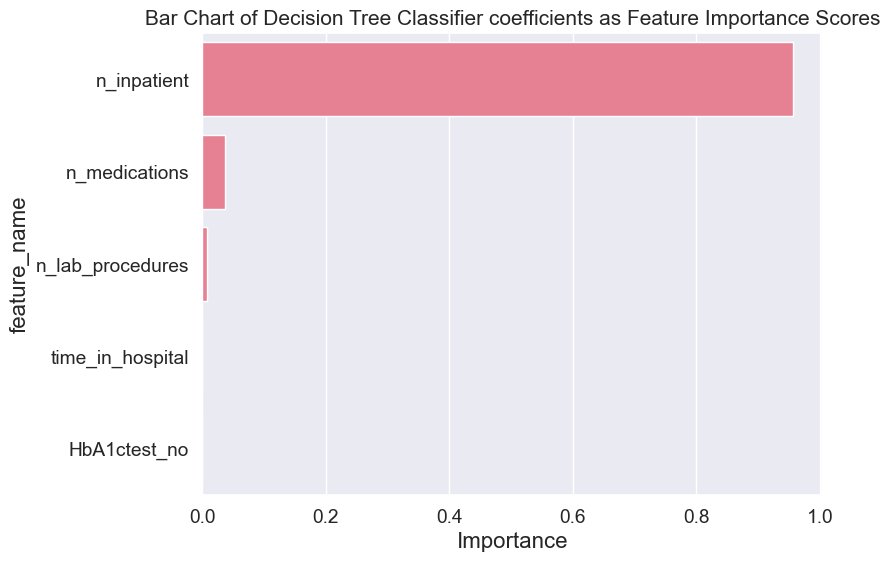

In [44]:
# get importance
importance = dtc.feature_importances_

# plot feature importance
imp_df = pd.DataFrame({'feature_name':names, 'Importance':importance})
fi = imp_df.sort_values(by='Importance', ascending=False).head()

# plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(data=fi, x= 'Importance', y='feature_name')
plt.xlabel('Importance', fontsize=16)
plt.ylabel('feature_name', fontsize=16)
plt.title('Bar Chart of Decision Tree Classifier coefficients as Feature Importance Scores')
plt.show()

## RANDOM FOREST CLASSIFIER

In [45]:
# define the model
rfc = RandomForestClassifier(random_state=23,n_estimators=100,max_depth=6)

In [46]:
# fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=23)

In [47]:
test_predictions = rfc.predict(X_test)
train_prediction = rfc.predict(X_train)
#check model accuracy, precison and recall score
acc_scoreX = accuracy_score(y_train, train_prediction)
print('Training_accuracy_score :', acc_scoreX)
acc_score = accuracy_score(y_test, test_predictions)
print('Testing_accuracy_score :', acc_score)
pre_score = precision_score(y_test, test_predictions)
print('precision_score :', pre_score)
rec_score = recall_score(y_test, test_predictions)
print('recall_score :',rec_score)

Training_accuracy_score : 0.6290285714285714
Testing_accuracy_score : 0.6085333333333334
precision_score : 0.6184738955823293
recall_score : 0.4367555303460011


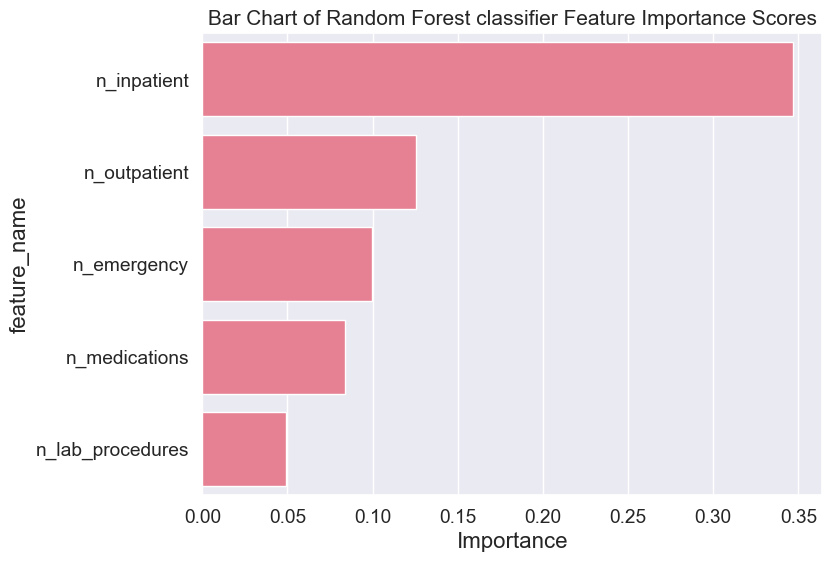

In [48]:
# get importance
importance = rfc.feature_importances_

imp_df = pd.DataFrame({'feature_name':names, 'Importance':importance})
fi = imp_df.sort_values(by='Importance', ascending=False).head()

# plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(data=fi, x= 'Importance', y='feature_name')
plt.xlabel('Importance', fontsize=16)
plt.ylabel('feature_name', fontsize=16)
plt.title('Bar Chart of Random Forest classifier Feature Importance Scores')
plt.show()

### TUNING RANDOM FOREST HYPER-PARAMETERS

In [49]:
#inspecting the hyperparameters of the randomforestclassifier
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 23, 'verbose': 0, 'warm_start': False}


In [50]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=23)



In [51]:
params_rfc = {'max_depth':[3,6,8], 'min_samples_leaf':[0.04, 0.08, 1], 'max_features':['auto','sqrt','log2']}

grid_rfc = GridSearchCV(estimator=rfc , param_grid= params_rfc, scoring='accuracy', cv=10, n_jobs=-1)
grid_rfc.fit(X_train, y_train)




/Users/akshitajain/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
85 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/akshitajain/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/akshitajain/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/akshitajain/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_con

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=23),
             n_jobs=-1,
             param_grid={'max_depth': [3, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [0.04, 0.08, 1]},
             scoring='accuracy')

In [52]:
#extract best hyperparameters from grid_rfc
best_hyperparams = grid_rfc.best_params_
print("best_hyperparams: ", best_hyperparams)



best_hyperparams:  {'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 1}


In [53]:
#extract best cv score
best_cv_score = grid_rfc.best_score_
print("best_cv_score: ", best_cv_score)

#extract best model
best_model = grid_rfc.best_estimator_
print("best_model: ", best_model)

#evaluate test set accuracy
test_acc = best_model.score(X_test, y_test)
print("test_acc: ",test_acc)

best_cv_score:  0.6152
best_model:  RandomForestClassifier(max_depth=8, max_features='log2', random_state=23)
test_acc:  0.6124


In [55]:
# define the model
rfc2 = RandomForestClassifier(random_state=23,max_depth=8, max_features= 'log2',min_samples_leaf=1)
# fit the model
rfc2.fit(X_train, y_train)



RandomForestClassifier(max_depth=8, max_features='log2', random_state=23)

In [56]:
test_predictions = rfc2.predict(X_test)
train_prediction = rfc2.predict(X_train)
#check model accuracy, precison and recall score
acc_scoreX = accuracy_score(y_train, train_prediction)
print('Training_accuracy_score :', acc_scoreX)
acc_score = accuracy_score(y_test, test_predictions)
print('Testing_accuracy_score :', acc_score)
pre_score = precision_score(y_test, test_predictions)
print('precision_score :', pre_score)
rec_score = recall_score(y_test, test_predictions)
print('recall_score :',rec_score)

Training_accuracy_score : 0.6490857142857143
Testing_accuracy_score : 0.6124
precision_score : 0.6227687425624752
recall_score : 0.44526375496313103


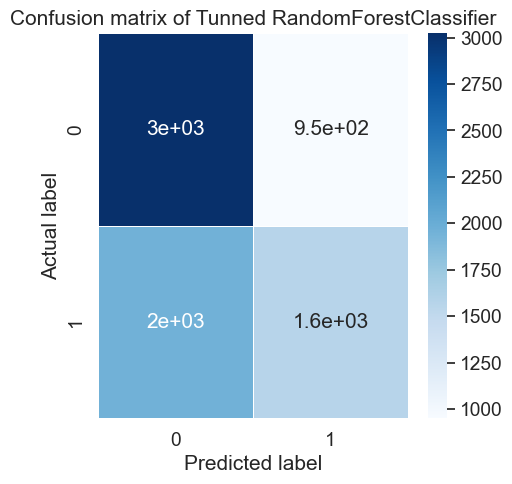

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidth=.5, annot=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix of Tunned RandomForestClassifier')
plt.show()


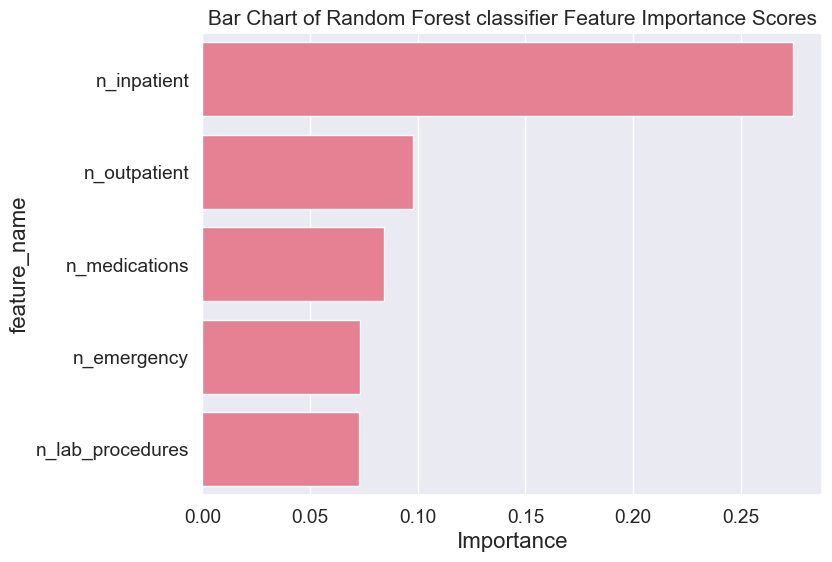

In [58]:
# get importance
importance = rfc2.feature_importances_

imp_df = pd.DataFrame({'feature_name':names, 'Importance':importance})
fi = imp_df.sort_values(by='Importance', ascending=False).head()

# plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(data=fi, x= 'Importance', y='feature_name')
plt.xlabel('Importance', fontsize=16)
plt.ylabel('feature_name', fontsize=16)
plt.title('Bar Chart of Random Forest classifier Feature Importance Scores')
plt.show()

### Model Selection
To evaluate model performance, I used DecisionTreeClassifier as a baseline model and RandomForestClassifier for comparison.

Both models performed similarly in terms of accuracy, precision, and recall. The RandomForestClassifier achieved an accuracy of 60%, a precision of 61%, and a recall of 44%. Meanwhile, the DecisionTreeClassifier had an accuracy of 60%, a precision of 61%, and a recall of 43%.

One key advantage of these models is their ability to show feature importance. In the DecisionTreeClassifier, the most influential features for predicting patient readmission were n_inpatient, n_outpatient, and n_lab_procedures. In contrast, the RandomForestClassifier identified n_inpatient, n_outpatient, and n_emergency as the top factors.

Since both models had relatively low accuracy, I fine-tuned the RandomForestClassifier using GridSearchCV to optimize its hyperparameters. This tuning process led to a slight improvement, increasing the accuracy to 61%. Interestingly, after tuning, the model highlighted n_inpatient, n_outpatient, and n_medications as the most important features for predicting patient readmission.

This analysis suggests that patient inpatient visits and outpatient visits consistently play a crucial role in predicting readmission, while other influential features may vary depending on the model used.